In [328]:
import numpy as np
import pandas as pd
import re

pd.options.display.max_columns = None

In [329]:
def find_headers(dataframe):
    # Search Date/time header
    header_idx = -1
    for ri, rows in enumerate(dataframe.values):
        for ri, row in enumerate(rows):
            is_header = 'Date/Time'.lower() in str(row).lower()
            if is_header:
                header_idx = ri + 1
                break

    # Check if a valid header index was found
    if header_idx != -1:
        print("Header found at row index:", header_idx)
        # Set the header and skip rows accordingly
        dataframe = pd.DataFrame(dataframe.values[header_idx:], columns=dataframe.iloc[header_idx - 1])
        dataframe = dataframe.reset_index(drop=True)
    else:
        print("Header not found in the DataFrame")
    return dataframe


def find_footer(dataframe):
    row_index = None
    for i, row in dataframe.iterrows():
        if 'Station Down (D)=' in str(row['Date/Time']):
            row_index = i
            break

    print('Remove footer at row index:', row_index)

    # Remove rows from the bottom up to and including the found row
    if row_index is not None:
        print("Removing rows from index:", row_index, -1)
        dataframe = dataframe.iloc[:row_index]

        # CLean NaN last 10 rows
        df_no10 = dataframe.iloc[:-10]
        df_cleaned = dataframe.tail(10).dropna(subset=['Date/Time'], how='any')
        dataframe = pd.concat([df_no10, df_cleaned], ignore_index=True)

    else:
        print("Text 'Station Down (D)=' not found")

    # Reset the index if needed
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [330]:
uri = r'D:\Work\Home-2023\may-project\project-mei\ข้อมูลย้อนหลัง10ปี\ผลการตรวจวัดคุณภาพอากาศ\PM10 2009-2019\Banhuafai.xlsx'
uri = r'D:\Work\Home-2023\may-project\project-mei\ข้อมูลย้อนหลัง10ปี\ผลการตรวจวัดคุณภาพอากาศ\NO2 2009-2019\Banhuafai.xlsx'
uri = r'D:\Work\Home-2023\may-project\project-mei\ข้อมูลย้อนหลัง10ปี\ผลการตรวจวัดคุณภาพอากาศ\NO2 2009-2019\BanHuayking.xlsx'
# uri = r'D:\Work\Home-2023\may-project\project-mei\ข้อมูลย้อนหลัง10ปี\ผลการตรวจวัดคุณภาพอากาศ\PM10 2009-2019\Banhuafai.xlsx'
xls = pd.ExcelFile(uri)

print('Sheet nums', xls.sheet_names)
dfs = []

for sheet_name in xls.sheet_names:
    # Read data from the current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name,)
    df = find_headers(df)
    df = find_footer(df)
    dfs.append(df)

concatenated_df = pd.concat(dfs, ignore_index=True)
df = concatenated_df

Sheet nums ['BanHuayking']
Header found at row index: 1
Remove footer at row index: None
Text 'Station Down (D)=' not found


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  3729 non-null   datetime64[ns]
 1   01:00      3729 non-null   object        
 2   02:00      3729 non-null   object        
 3   03:00      3729 non-null   object        
 4   04:00      3729 non-null   object        
 5   05:00      3729 non-null   object        
 6   06:00      3729 non-null   object        
 7   07:00      3729 non-null   object        
 8   08:00      3729 non-null   object        
 9   09:00      3729 non-null   object        
 10  10:00      3729 non-null   object        
 11  11:00      3729 non-null   object        
 12  12:00      3729 non-null   object        
 13  13:00      3729 non-null   object        
 14  14:00      3729 non-null   object        
 15  15:00      3729 non-null   object        
 16  16:00      3729 non-null   object        


In [333]:
row_index = None
for i, row in df.iterrows():
    if 'Station Down (D)=' in str(row['Date/Time']):
        row_index = i
        break

print('Remove footer at row index:', row_index)

# Remove rows from the bottom up to and including the found row
if row_index is not None:
    print("Removing rows from index:", row_index, -1)
    df = df.iloc[:row_index - 1]
else:
    print("Text 'Station Down (D)=' not found")

# Reset the index if needed
df = df.reset_index(drop=True)

Remove footer at row index: None
Text 'Station Down (D)=' not found


In [334]:
str_fill = ['F', 'C', 'D', 'A', 'P', '-', 'O']
df = df.replace(str_fill, [np.NaN] * str_fill.__len__())
# df = df.ffill().bfill()

In [335]:
df.columns

Index(['Date/Time', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00',
       '23:00', '24:00', '24 AVG', '1 Hr>320', 'MAX'],
      dtype='object', name=0)

In [336]:
# Use a regular expression to filter columns with the pattern 'xx:xx'
time_pattern = r'\d{2}:\d{2}(:\d{2})*'
time_columns = [col for col in df.columns if re.search(time_pattern, str(col))]
if len(time_columns) == 24:  # Check if you have 24 time columns
    start_time = '1990-01-01 01:00:00'
    end_time = '1990-01-02 00:59:59'
    time_range = pd.date_range(start=start_time, end=end_time, freq='1H')
    time_columns = [time.strftime('%H:%M:%S') for time in time_range.time]
else:
    raise ValueError('The number of time columns is not 24')

df = df.iloc[:,:25]
df.columns = ['Date/Time'] + time_columns

df

Date/Time  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  06:00:00  \
0    2009-01-01       4.0      15.0       9.0       4.0       2.0       2.0   
1    2009-01-02       8.0       6.0       4.0       4.0       4.0       2.0   
2    2009-01-03       4.0       4.0       2.0       2.0       8.0       9.0   
3    2009-01-04      13.0       6.0       6.0       8.0       9.0       6.0   
4    2009-01-05      11.0      11.0      11.0       4.0       4.0       6.0   
...         ...       ...       ...       ...       ...       ...       ...   
3724 2019-03-14      13.0      15.0      13.0      13.0      15.0      23.0   
3725 2019-03-15      11.0      13.0      13.0      15.0      15.0      23.0   
3726 2019-03-16      11.0      11.0      11.0      11.0       9.0      11.0   
3727 2019-03-17      11.0      13.0      13.0      13.0      13.0      15.0   
3728 2019-03-18       9.0      11.0      11.0       9.0      11.0      15.0   

      07:00:00  08:00:00  09:00:00  10:00:00  11:00:00  12:00:00  13:00:00  \
0          2.0       2.0       6.0       9.0      11.0      28.0      43.0   
1          2.0       2.0       6.0       6.0       4.0       8.0      13.0   
2          6.0       4.0      11.0      15.0       9.0       8.0       6.0   
3          4.0       6.0      17.0      32.0      17.0      24.0      36.0   
4          4.0       8.0      17.0      17.0      32.0       9.0       2.0   
...        ...       ...       ...       ...       ...       ...       ...   
3724      21.0      17.0      38.0      28.0      19.0      11.0       9.0   
3725      24.0      21.0      55.0      51.0       9.0       8.0       6.0   
3726      13.0      23.0      53.0      47.0      11.0       4.0       4.0   
3727      15.0      15.0       9.0       8.0       6.0       4.0       4.0   
3728      11.0      11.0      28.0      17.0       6.0       4.0       4.0   

      14:00:00  15:00:00  16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  \
0         24.0      17.0       NaN       4.0       6.0       4.0       4.0   
1         13.0      17.0       NaN       6.0       8.0       4.0       4.0   
2          9.0      13.0       NaN      15.0      19.0      11.0      11.0   
3         15.0       8.0       NaN       2.0       6.0       6.0       4.0   
4          2.0       2.0       NaN       4.0       8.0       9.0       4.0   
...        ...       ...       ...       ...       ...       ...       ...   
3724       6.0       8.0       NaN       6.0       8.0      13.0       9.0   
3725       6.0       6.0       NaN       4.0       4.0       6.0       9.0   
3726       4.0       4.0       NaN       4.0       4.0       6.0       6.0   
3727       4.0       4.0       NaN       4.0       4.0       4.0       8.0   
3728       4.0       4.0       NaN       4.0       4.0       6.0       9.0   

      21:00:00  22:00:00  23:00:00  00:00:00  
0          6.0      17.0      15.0       9.0  
1          4.0       6.0       4.0       4.0  
2         11.0       6.0       4.0       4.0  
3          4.0       2.0       2.0       4.0  
4          2.0       2.0       2.0       4.0  
...        ...       ...       ...       ...  
3724       8.0       8.0       8.0       9.0  
3725       9.0       8.0       8.0       9.0  
3726       8.0       9.0       9.0       9.0  
3727       8.0       8.0       9.0       9.0  
3728       8.0       4.0       4.0      13.0  

[3729 rows x 25 columns]

In [337]:
# Use melt to flatten the selected columns into rows
melted_df = pd.melt(df, id_vars=['Date/Time'], var_name='Time', value_name='Value')
melted_df



Date/Time      Time  Value
0     2009-01-01  01:00:00    4.0
1     2009-01-02  01:00:00    8.0
2     2009-01-03  01:00:00    4.0
3     2009-01-04  01:00:00   13.0
4     2009-01-05  01:00:00   11.0
...          ...       ...    ...
89491 2019-03-14  00:00:00    9.0
89492 2019-03-15  00:00:00    9.0
89493 2019-03-16  00:00:00    9.0
89494 2019-03-17  00:00:00    9.0
89495 2019-03-18  00:00:00   13.0

[89496 rows x 3 columns]

In [338]:
melted_df['Datetime'] = pd.to_datetime(melted_df['Date/Time'].astype(str), format='%Y-%m-%d', errors='coerce')
melted_df['_time_dt'] = pd.to_datetime(melted_df['Time'], format='%H:%M:%S', errors='coerce').dt.time
melted_df['Datetime'] += pd.to_timedelta(melted_df['_time_dt'].astype(str))
melted_df.loc[melted_df['Time'] == '00:00:00', 'Datetime'] += pd.DateOffset(days=1)



# melted_df = melted_df[['Datetime', 'Value']]
melted_df

Date/Time      Time  Value            Datetime  _time_dt
0     2009-01-01  01:00:00    4.0 2009-01-01 01:00:00  01:00:00
1     2009-01-02  01:00:00    8.0 2009-01-02 01:00:00  01:00:00
2     2009-01-03  01:00:00    4.0 2009-01-03 01:00:00  01:00:00
3     2009-01-04  01:00:00   13.0 2009-01-04 01:00:00  01:00:00
4     2009-01-05  01:00:00   11.0 2009-01-05 01:00:00  01:00:00
...          ...       ...    ...                 ...       ...
89491 2019-03-14  00:00:00    9.0 2019-03-15 00:00:00  00:00:00
89492 2019-03-15  00:00:00    9.0 2019-03-16 00:00:00  00:00:00
89493 2019-03-16  00:00:00    9.0 2019-03-17 00:00:00  00:00:00
89494 2019-03-17  00:00:00    9.0 2019-03-18 00:00:00  00:00:00
89495 2019-03-18  00:00:00   13.0 2019-03-19 00:00:00  00:00:00

[89496 rows x 5 columns]

In [340]:
df_sorted = melted_df.sort_values(by='Datetime')
df_sorted.reset_index(drop=True, inplace=True)
melted_df = df_sorted

# Extract years from the Datetime column
melted_df['Year'] = melted_df['Datetime'].dt.year
unique_years = melted_df['Year'].unique()

melted_df

Date/Time      Time  Value            Datetime  _time_dt  Year
0     2009-01-01  01:00:00    4.0 2009-01-01 01:00:00  01:00:00  2009
1     2009-01-01  02:00:00   15.0 2009-01-01 02:00:00  02:00:00  2009
2     2009-01-01  03:00:00    9.0 2009-01-01 03:00:00  03:00:00  2009
3     2009-01-01  04:00:00    4.0 2009-01-01 04:00:00  04:00:00  2009
4     2009-01-01  05:00:00    2.0 2009-01-01 05:00:00  05:00:00  2009
...          ...       ...    ...                 ...       ...   ...
89491 2019-03-18  20:00:00    9.0 2019-03-18 20:00:00  20:00:00  2019
89492 2019-03-18  21:00:00    8.0 2019-03-18 21:00:00  21:00:00  2019
89493 2019-03-18  22:00:00    4.0 2019-03-18 22:00:00  22:00:00  2019
89494 2019-03-18  23:00:00    4.0 2019-03-18 23:00:00  23:00:00  2019
89495 2019-03-18  00:00:00   13.0 2019-03-19 00:00:00  00:00:00  2019

[89496 rows x 6 columns]

In [341]:
melted_df['ValueLn'] = melted_df['Value'].interpolate(method='linear')
melted_df

Date/Time      Time  Value            Datetime  _time_dt  Year  ValueLn
0     2009-01-01  01:00:00    4.0 2009-01-01 01:00:00  01:00:00  2009      4.0
1     2009-01-01  02:00:00   15.0 2009-01-01 02:00:00  02:00:00  2009     15.0
2     2009-01-01  03:00:00    9.0 2009-01-01 03:00:00  03:00:00  2009      9.0
3     2009-01-01  04:00:00    4.0 2009-01-01 04:00:00  04:00:00  2009      4.0
4     2009-01-01  05:00:00    2.0 2009-01-01 05:00:00  05:00:00  2009      2.0
...          ...       ...    ...                 ...       ...   ...      ...
89491 2019-03-18  20:00:00    9.0 2019-03-18 20:00:00  20:00:00  2019      9.0
89492 2019-03-18  21:00:00    8.0 2019-03-18 21:00:00  21:00:00  2019      8.0
89493 2019-03-18  22:00:00    4.0 2019-03-18 22:00:00  22:00:00  2019      4.0
89494 2019-03-18  23:00:00    4.0 2019-03-18 23:00:00  23:00:00  2019      4.0
89495 2019-03-18  00:00:00   13.0 2019-03-19 00:00:00  00:00:00  2019     13.0

[89496 rows x 7 columns]

In [342]:
missing_values = melted_df.isna().sum()
summary_stats = melted_df.describe()
unique_values = melted_df['Datetime'].unique()
value_counts = melted_df['Datetime'].value_counts()
yearly_sum = melted_df.groupby('Year').count()
missing_values

Date/Time       0
Time            0
Value        4882
Datetime        0
_time_dt        0
Year            0
ValueLn         0
dtype: int64

In [343]:
summary_stats

Date/Time         Value             Datetime          Year  \
count                89496  84614.000000                89496  89496.000000   
mean   2014-02-08 00:00:00      5.533221  2014-02-08 12:30:00   2013.613949   
min    2009-01-01 00:00:00      0.000000  2009-01-01 01:00:00   2009.000000   
25%    2011-07-22 00:00:00      2.000000  2011-07-22 06:45:00   2011.000000   
50%    2014-02-08 00:00:00      4.000000  2014-02-08 12:30:00   2014.000000   
75%    2016-08-28 00:00:00      6.000000  2016-08-28 18:15:00   2016.000000   
max    2019-03-18 00:00:00    135.000000  2019-03-19 00:00:00   2019.000000   
std                    NaN      7.793148                  NaN      2.947771   

            ValueLn  
count  89496.000000  
mean       5.508107  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max      135.000000  
std        7.789566

In [344]:
yearly_sum

Date/Time  Time  Value  Datetime  _time_dt  ValueLn
Year                                                     
2009       8759  8759   8287      8759      8759     8759
2010       8760  8760   8278      8760      8760     8760
2011       8760  8760   8321      8760      8760     8760
2012       8784  8784   8353      8784      8784     8784
2013       8760  8760   8322      8760      8760     8760
2014       8760  8760   8221      8760      8760     8760
2015       8760  8760   8335      8760      8760     8760
2016       8784  8784   8360      8784      8784     8784
2017       8760  8760   8145      8760      8760     8760
2018       8760  8760   8223      8760      8760     8760
2019       1849  1849   1769      1849      1849     1849

In [345]:
melted_df[melted_df['Value'].isna()]


Date/Time      Time  Value            Datetime  _time_dt  Year  ValueLn
15    2009-01-01  16:00:00    NaN 2009-01-01 16:00:00  16:00:00  2009     10.5
39    2009-01-02  16:00:00    NaN 2009-01-02 16:00:00  16:00:00  2009     11.5
63    2009-01-03  16:00:00    NaN 2009-01-03 16:00:00  16:00:00  2009     14.0
87    2009-01-04  16:00:00    NaN 2009-01-04 16:00:00  16:00:00  2009      5.0
111   2009-01-05  16:00:00    NaN 2009-01-05 16:00:00  16:00:00  2009      3.0
...          ...       ...    ...                 ...       ...   ...      ...
89391 2019-03-14  16:00:00    NaN 2019-03-14 16:00:00  16:00:00  2019      7.0
89415 2019-03-15  16:00:00    NaN 2019-03-15 16:00:00  16:00:00  2019      5.0
89439 2019-03-16  16:00:00    NaN 2019-03-16 16:00:00  16:00:00  2019      4.0
89463 2019-03-17  16:00:00    NaN 2019-03-17 16:00:00  16:00:00  2019      4.0
89487 2019-03-18  16:00:00    NaN 2019-03-18 16:00:00  16:00:00  2019      4.0

[4882 rows x 7 columns]

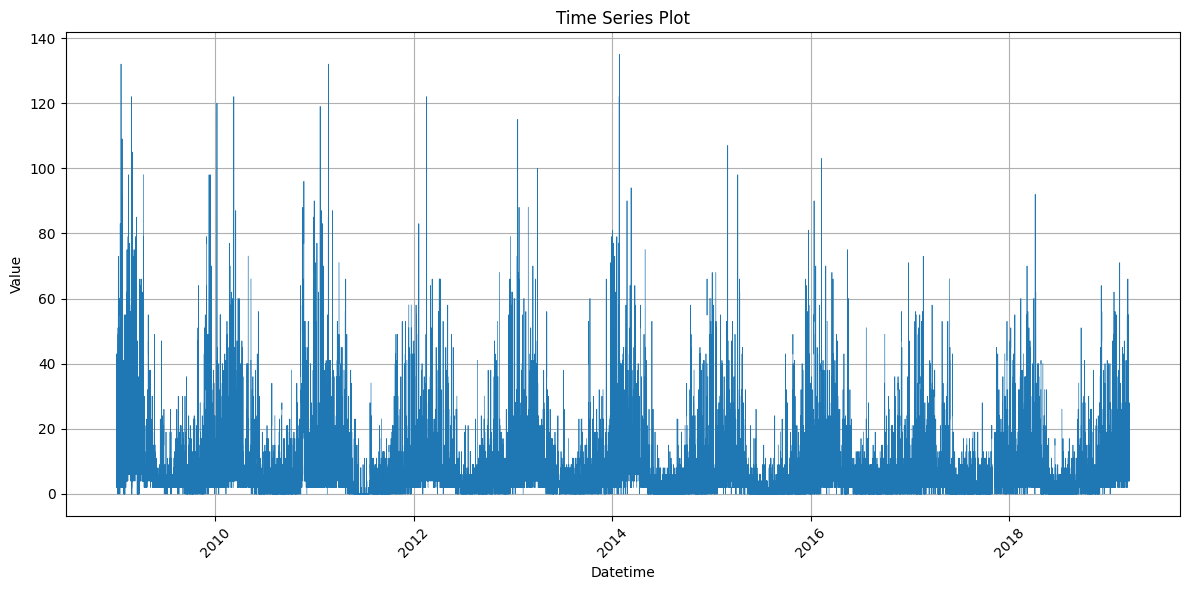

In [346]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(melted_df['Datetime'], melted_df['Value'], linestyle='-', lw=0.5)
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

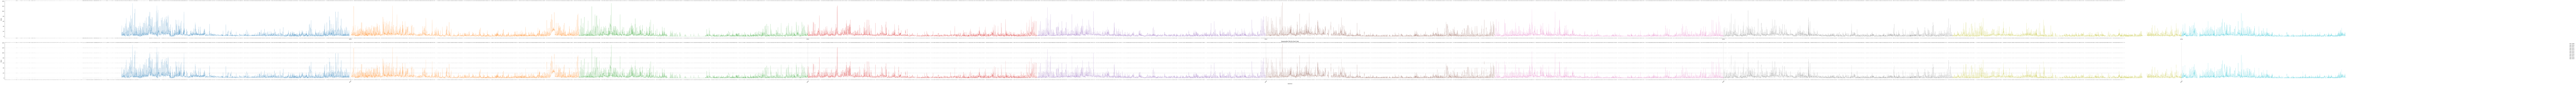

In [347]:

# Plot seasonality for each year
plt.figure(figsize=(360, 12))
# First subplot on the left

for year in unique_years:
    year_data = melted_df[melted_df['Year'] == year]
    plt.subplot(2, 1, 1)
    plt.plot(year_data['Datetime'], year_data['ValueLn'], label=f'Year {year}', lw=0.5)
    plt.ylabel('Value')
    plt.subplot(2, 1, 2)
    plt.plot(year_data['Datetime'], year_data['Value'], label=f'Year {year}', lw=0.5)
    plt.ylabel('Value')

plt.xlabel('Datetime')

plt.title('Seasonality Plot for Each Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()

# Show the plot
plt.savefig('Seasonality.png')